# Polynomial Regression（多项式回归）

## 一、多项式回归模拟

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.random.uniform(-3, 3, size=100)
X = x.reshape(-1, 1)

In [3]:
y = 0.5 * x**2 + x + 2 + np.random.normal(0, 1, size=100)

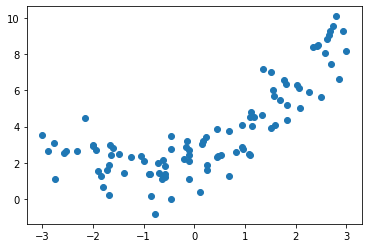

In [4]:
plt.scatter(x, y)
plt.show()

In [5]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [6]:
y_predict = lin_reg.predict(X)

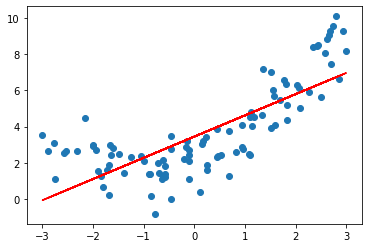

In [7]:
plt.scatter(x, y)
plt.plot(x, y_predict, color='r')
plt.show()

#### 解决方案：添加一个特征（原有特征的组合）【升维】

In [8]:
(X**2).shape

(100, 1)

In [9]:
X2 = np.hstack([X, X**2])

In [10]:
X2.shape

(100, 2)

In [11]:
lin_reg2 = LinearRegression()
lin_reg2.fit(X2, y)
y_predict2 = lin_reg2.predict(X2)

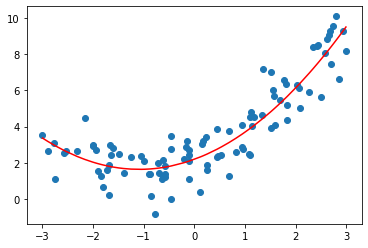

In [12]:
plt.scatter(x, y)
plt.plot(np.sort(x), y_predict2[np.argsort(x)], color='r')
plt.show()

In [13]:
lin_reg2.coef_

array([1.02725202, 0.47293871])

In [14]:
lin_reg2.intercept_

2.1890673578899023

## 二、scikit-learn中的多项式回归和Pipeline

In [15]:
import numpy as np
import matplotlib.pyplot as plt

In [16]:
x = np.random.uniform(-3, 3, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x**2 + x + 2 + np.random.normal(0, 1, size=100)

In [17]:
from sklearn.preprocessing import PolynomialFeatures

In [18]:
poly = PolynomialFeatures(degree=2)
poly.fit(X)
X2 = poly.transform(X)

In [19]:
X2.shape

(100, 3)

In [20]:
X2[:5, :]

array([[ 1.        ,  2.65829706,  7.06654327],
       [ 1.        ,  0.95986449,  0.92133985],
       [ 1.        , -1.3491514 ,  1.8202095 ],
       [ 1.        , -2.99223514,  8.95347114],
       [ 1.        ,  1.54325642,  2.38164037]])

In [21]:
X[:5, :]

array([[ 2.65829706],
       [ 0.95986449],
       [-1.3491514 ],
       [-2.99223514],
       [ 1.54325642]])

In [22]:
from sklearn.linear_model import LinearRegression

lin_reg2 = LinearRegression()
lin_reg2.fit(X2, y)
y_predict2 = lin_reg2.predict(X2)

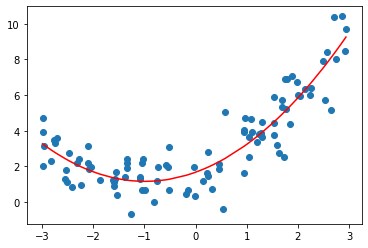

In [23]:
plt.scatter(x, y)
plt.plot(np.sort(x), y_predict2[np.argsort(x)], color='r')
plt.show()

In [24]:
lin_reg2.coef_

array([0.        , 1.03558656, 0.52353761])

In [25]:
lin_reg2.intercept_

1.6749897284232724

### 关于PolynomialFeatures

In [26]:
X = np.arange(1, 11).reshape(-1, 2)

In [27]:
X.shape

(5, 2)

In [28]:
X

array([[ 1,  2],
       [ 3,  4],
       [ 5,  6],
       [ 7,  8],
       [ 9, 10]])

In [29]:
poly = PolynomialFeatures(degree=2)
poly.fit(X)
X2 = poly.transform(X)

In [30]:
X2.shape

(5, 6)

In [31]:
X2

array([[  1.,   1.,   2.,   1.,   2.,   4.],
       [  1.,   3.,   4.,   9.,  12.,  16.],
       [  1.,   5.,   6.,  25.,  30.,  36.],
       [  1.,   7.,   8.,  49.,  56.,  64.],
       [  1.,   9.,  10.,  81.,  90., 100.]])

### Pipeline（多项式特征、数据归一化、线性回归）

In [32]:
x = np.random.uniform(-3, 3, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x**2 + x + 2 + np.random.normal(0, 1, size=100)

In [33]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

poly_reg = Pipeline([
    ("poly", PolynomialFeatures(degree=2)),
    ("std_scaler", StandardScaler()),
    ("lin_reg", LinearRegression())
])

In [34]:
poly_reg.fit(X, y)
y_predict = poly_reg.predict(X)

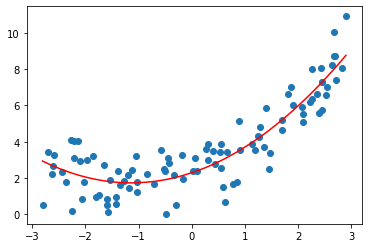

In [35]:
plt.scatter(x, y)
plt.plot(np.sort(x), y_predict[np.argsort(x)], color='r')
plt.show()

## 三、过拟合（over fitting）和欠拟合（under fitting）

#### 过拟合：算法所训练的模型过多地表达了数据间的噪音关系
#### 欠拟合：算法所训练的模型不能完整表述数据关系
#### 模型复杂度 <-> 模型准确率   ---->   模型泛化能力

In [36]:
import numpy as np
import matplotlib.pyplot as plt

In [37]:
np.random.seed(666)
x = np.random.uniform(-3, 3, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x**2 + x + 2 + np.random.normal(0, 1, size=100)

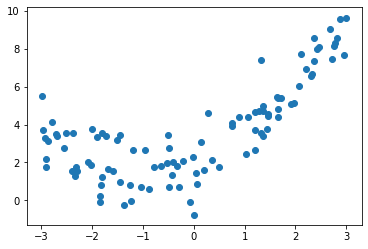

In [38]:
plt.scatter(x, y)
plt.show()

#### 使用线性回归

In [39]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.score(X, y)

0.4953707811865009

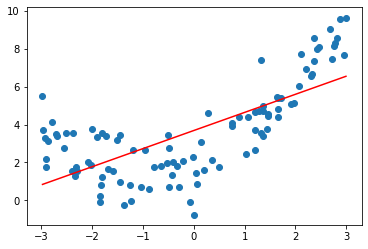

In [40]:
y_predict = lin_reg.predict(X)
plt.scatter(x, y)
plt.plot(np.sort(x), y_predict[np.argsort(x)], color='r')
plt.show()

In [41]:
from sklearn.metrics import mean_squared_error

y_predict = lin_reg.predict(X)
mean_squared_error(y, y_predict)

3.0750025765636577

#### 使用多项式回归

In [42]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

def PolynomialRegression(degree):
     return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scaler", StandardScaler()),
        ("lin_reg", LinearRegression())
    ])

In [43]:
poly2_reg = PolynomialRegression(degree=2)
poly2_reg.fit(X, y)

Pipeline(memory=None,
         steps=[('poly',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('std_scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('lin_reg',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [44]:
y2_predict = poly2_reg.predict(X)
mean_squared_error(y, y2_predict)

1.0987392142417856

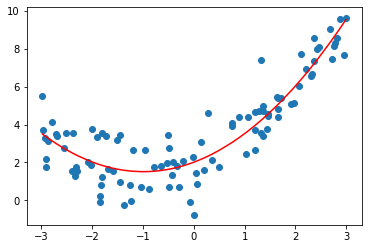

In [45]:
plt.scatter(x, y)
plt.plot(np.sort(x), y2_predict[np.argsort(x)], color='r')
plt.show()

In [46]:
poly10_reg = PolynomialRegression(degree=10)
poly10_reg.fit(X, y)

y10_predict = poly10_reg.predict(X)
mean_squared_error(y, y10_predict)

1.0508466763764202

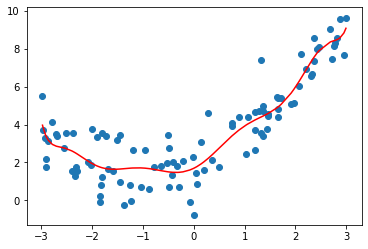

In [47]:
plt.scatter(x, y)
plt.plot(np.sort(x), y10_predict[np.argsort(x)], color='r')
plt.show()

In [48]:
poly100_reg = PolynomialRegression(degree=100)
poly100_reg.fit(X, y)

y100_predict = poly100_reg.predict(X)
mean_squared_error(y, y100_predict)

0.6870911922673567

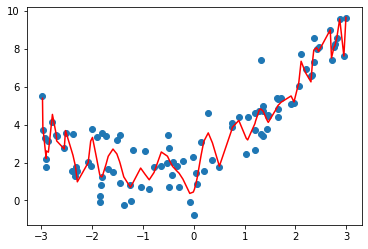

In [49]:
plt.scatter(x, y)
plt.plot(np.sort(x), y100_predict[np.argsort(x)], color='r')
plt.show()

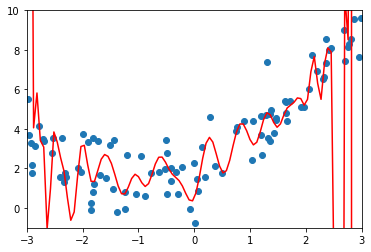

In [50]:
X_plot = np.linspace(-3, 3, 100).reshape(100, 1)
y_plot = poly100_reg.predict(X_plot)

plt.scatter(x, y)
plt.plot(X_plot[:,0], y_plot, color='r')
plt.axis([-3, 3, -1, 10])
plt.show()

#### train test split的意义

In [51]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, random_state=666)

In [52]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_predict = lin_reg.predict(X_test)
mean_squared_error(y_test, y_predict)

2.2199965269396573

In [53]:
poly2_reg = PolynomialRegression(degree=2)
poly2_reg.fit(X_train, y_train)

y2_predict = poly2_reg.predict(X_test)
mean_squared_error(y_test, y2_predict)

0.8035641056297901

In [54]:
poly10_reg = PolynomialRegression(degree=10)
poly10_reg.fit(X_train, y_train)

y10_predict = poly10_reg.predict(X_test)
mean_squared_error(y_test, y10_predict)

0.9212930722150697

In [56]:
poly100_reg = PolynomialRegression(degree=100)
poly100_reg.fit(X_train, y_train)

y100_predict = poly100_reg.predict(X_test)
mean_squared_error(y_test, y100_predict)

14075780347.739939

## 四、学习曲线

#### 随着训练样本的逐渐增多，算法训练出的模型的表现能力

In [58]:
import numpy as np
import matplotlib.pyplot as plt

In [59]:
np.random.seed(666)
x = np.random.uniform(-3, 3, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x**2 + x + 2 + np.random.normal(0, 1, size=100)

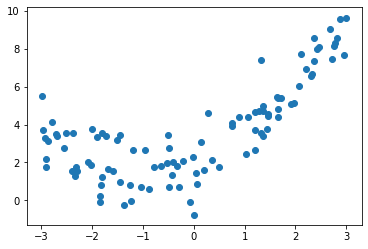

In [60]:
plt.scatter(x, y)
plt.show()

#### 学习曲线

In [62]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, random_state=10)

In [63]:
X_train.shape

(75, 1)

In [64]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

train_score = []
test_score = []
for i in range(1, 76):
    lin_reg = LinearRegression()
    lin_reg.fit(X_train[:i], y_train[:i])
    
    y_train_predict = lin_reg.predict(X_train[:i])
    train_score.append(mean_squared_error(y_train[:i], y_train_predict))
    
    y_test_predict = lin_reg.predict(X_test)
    test_score.append(mean_squared_error(y_test, y_test_predict))

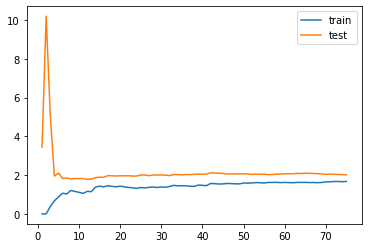

In [65]:
plt.plot([i for i in range(1, 76)], np.sqrt(train_score), label="train")
plt.plot([i for i in range(1, 76)], np.sqrt(test_score), label="test")
plt.legend()
plt.show()

In [69]:
def plot_learning_curve(algo, X_train, X_test, y_train, y_test):
    train_score = []
    test_score = []
    for i in range(1, len(X_train)+1):
        algo.fit(X_train[:i], y_train[:i])
    
        y_train_predict = algo.predict(X_train[:i])
        train_score.append(mean_squared_error(y_train[:i], y_train_predict))
    
        y_test_predict = algo.predict(X_test)
        test_score.append(mean_squared_error(y_test, y_test_predict))
        
    plt.plot([i for i in range(1, len(X_train)+1)], np.sqrt(train_score), label="train")
    plt.plot([i for i in range(1, len(X_train)+1)], np.sqrt(test_score), label="test")
    plt.legend()
    plt.axis([0, len(X_train)+1, 0, 4])
    plt.show()

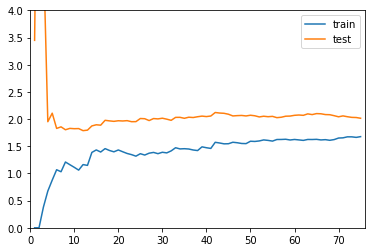

In [70]:
plot_learning_curve(LinearRegression(), X_train, X_test, y_train, y_test)

In [71]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

def PolynomialRegression(degree):
     return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scaler", StandardScaler()),
        ("lin_reg", LinearRegression())
    ])

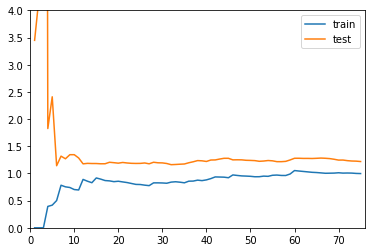

In [72]:
poly2_reg = PolynomialRegression(degree=2)
plot_learning_curve(poly2_reg, X_train, X_test, y_train, y_test)

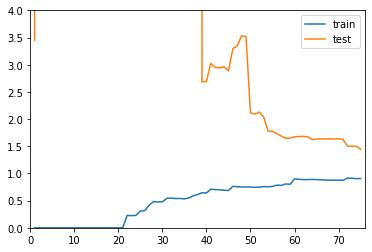

In [73]:
poly20_reg = PolynomialRegression(degree=20)
plot_learning_curve(poly20_reg, X_train, X_test, y_train, y_test)

## 五、交叉验证

#### 用途：避免对特定测试数据集过拟合
#### 方法：1、引入验证数据集（调整超参数）【测试数据集（衡量最终模型性能）】 2、交叉验证（CV）以解决随机

In [75]:
import numpy as np
from sklearn import datasets

In [76]:
digits = datasets.load_digits()
X = digits.data
y = digits.target

#### 测试train_test_split

In [78]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.4, random_state=666)

In [79]:
from sklearn.neighbors import KNeighborsClassifier

best_score, best_p, best_k = 0, 0, 0
for k in range(2, 11):
    for p in range(1, 6):
        knn_clf = KNeighborsClassifier(weights="distance", n_neighbors=k, p=p)
        knn_clf.fit(X_train, y_train)
        score = knn_clf.score(X_test, y_test)
        if score > best_score:
            best_score, best_p, best_k = score, p, k
            
print("best k =", best_k)
print("best p =", best_p)
print("best score =", best_score)

best k = 3
best p = 4
best score = 0.9860917941585535


#### 使用交叉验证

In [80]:
from sklearn.model_selection import cross_val_score

knn_clf = KNeighborsClassifier()
cross_val_score(knn_clf, X_train, y_train)

array([0.99537037, 0.98148148, 0.97685185, 0.97674419, 0.97209302])

In [81]:
best_score, best_p, best_k = 0, 0, 0
for k in range(2, 11):
    for p in range(1, 6):
        knn_clf = KNeighborsClassifier(weights="distance", n_neighbors=k, p=p)
        scores = cross_val_score(knn_clf, X_train, y_train)
        score = np.mean(scores)
        if score > best_score:
            best_score, best_p, best_k = score, p, k
            
print("best k =", best_k)
print("best p =", best_p)
print("best score =", best_score)

best k = 2
best p = 2
best score = 0.9851507321274763


In [82]:
best_knn_clf = KNeighborsClassifier(weights="distance", n_neighbors=2, p=2)

In [83]:
best_knn_clf.fit(X_train, y_train)
best_knn_clf.score(X_test, y_test)

0.980528511821975

#### 回顾网格搜素

In [84]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {
        "weights": ['distance'],
        "n_neighbors": [i for i in range(2, 11)],
        "p": [i for i in range(1, 6)]
    }
]

grid_search = GridSearchCV(knn_clf, param_grid, verbose=1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 45 candidates, totalling 225 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 225 out of 225 | elapsed:   48.4s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=10, p=5,
                                            weights='distance'),
             iid='deprecated', n_jobs=None,
             param_grid=[{'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                          'p': [1, 2, 3, 4, 5], 'weights': ['distance']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [85]:
grid_search.best_score_

0.9851507321274763

In [86]:
grid_search.best_params_

{'n_neighbors': 2, 'p': 2, 'weights': 'distance'}

In [87]:
best_knn_clf = grid_search.best_estimator_
best_knn_clf.score(X_test, y_test)

0.980528511821975

In [88]:
cross_val_score(knn_clf, X_train, y_train, cv=3)

array([0.98055556, 0.98050139, 0.96100279])

In [89]:
GridSearchCV(knn_clf, param_grid, verbose=1, cv=3)

GridSearchCV(cv=3, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=10, p=5,
                                            weights='distance'),
             iid='deprecated', n_jobs=None,
             param_grid=[{'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                          'p': [1, 2, 3, 4, 5], 'weights': ['distance']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

#### 把训练数据集分成k份，称为 k-folds cross validation
#### 缺点在于每次需要训练k个模型，相当于整体性能慢了k倍

#### 留一法（LOO-CV）：完全不受随机的影响，最接近模型真正的性能指标，缺点在于计算量巨大
####                

## 六、偏差（Bias）方差（Variance）权衡

#### 模型误差 = 偏差 + 方差 + 不可避免的误差
#### 1、导致偏差的主要原因：对问题本身的假设不正确（eg. 非线性数据使用线性回归 【欠拟合】）
#### 2、导致方差的主要原因：数据的较小扰动都会较大地影响模型，通常原因是使用的模型太复杂（eg. 高阶多项式回归【过拟合】）
####                    

#### 非参数学习通常都是高方差算法，因为不对数据进行任何假设（eg. KNN）
#### 参数学习通常都是高偏差算法，因为对数据具有极强的假设（eg. 线性回归）
####               

#### 大多数算法具有相应的参数，可以调整偏差和方差
#### 偏差和方差通常是相互矛盾的，需要平衡偏差和方差
####          
#### 机器学习的主要挑战来自于方差
#### 解决高方差的通常手段：
#### 1、降低模型复杂度
#### 2、减少数据维度；降噪
#### 3、增加样本数
#### 4、使用验证集
#### 5、模型正则化

##                
## 七、模型正则化（Regularization）

#### 模型正则化：限制参数的大小

### 1、岭回归（Ridge Regression）

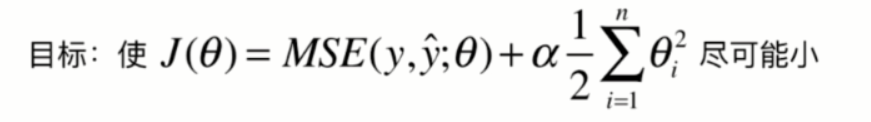

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
np.random.seed(42)
x = np.random.uniform(-3.0, 3.0, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x + 3 + np.random.normal(0, 1, size=100)

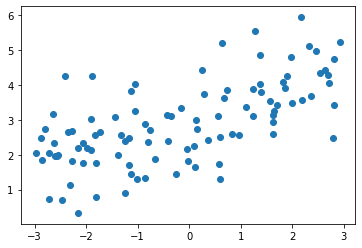

In [4]:
plt.scatter(x, y)
plt.show()

In [5]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

def PolynomialRegression(degree):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scaler", StandardScaler()),
        ("lin_reg", LinearRegression())
    ])

In [6]:
from sklearn.model_selection import train_test_split

np.random.seed(888)
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [7]:
from sklearn.metrics import mean_squared_error

poly_reg = PolynomialRegression(degree=20)
poly_reg.fit(X_train, y_train)

y_poly_predict = poly_reg.predict(X_test)
mean_squared_error(y_test, y_poly_predict)

96.60230374543055

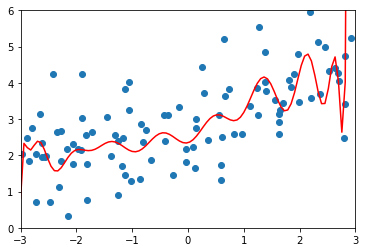

In [11]:
X_plot = np.linspace(-3, 3, 100).reshape(100, 1)
y_plot = poly_reg.predict(X_plot)

plt.scatter(x, y)
plt.plot(X_plot[:,0], y_plot, color='r')
plt.axis([-3, 3, 0, 6])
plt.show()

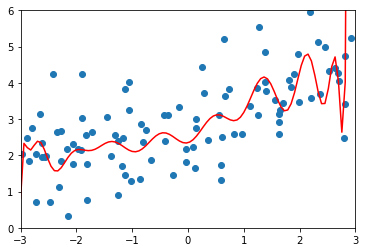

In [12]:
def plot_model(model):
    X_plot = np.linspace(-3, 3, 100).reshape(100, 1)
    y_plot = model.predict(X_plot)

    plt.scatter(x, y)
    plt.plot(X_plot[:,0], y_plot, color='r')
    plt.axis([-3, 3, 0, 6])
    plt.show()
    
plot_model(poly_reg)

#### 使用岭回归

In [14]:
from sklearn.linear_model import Ridge

def RidgeRegression(degree, alpha):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scaler", StandardScaler()),
        ("ridge_reg", Ridge(alpha=alpha))
    ])

In [15]:
ridge1_reg = RidgeRegression(20, 0.0001)
ridge1_reg.fit(X_train, y_train)

y1_predict = ridge1_reg.predict(X_test)
mean_squared_error(y_test, y1_predict)

0.9285559375995243

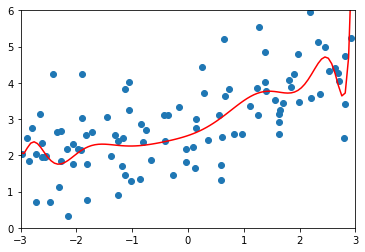

In [16]:
plot_model(ridge1_reg)

In [17]:
ridge2_reg = RidgeRegression(20, 1)
ridge2_reg.fit(X_train, y_train)

y2_predict = ridge2_reg.predict(X_test)
mean_squared_error(y_test, y2_predict)

1.0511531433614885

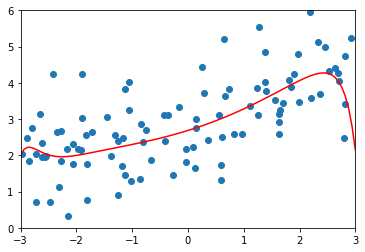

In [18]:
plot_model(ridge2_reg)

In [19]:
ridge3_reg = RidgeRegression(20, 100)
ridge3_reg.fit(X_train, y_train)

y3_predict = ridge3_reg.predict(X_test)
mean_squared_error(y_test, y3_predict)

1.0528125598088445

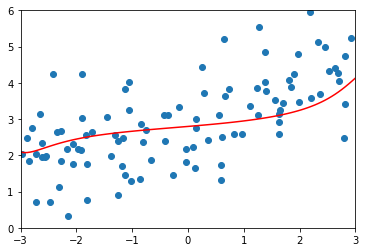

In [20]:
plot_model(ridge3_reg)

In [21]:
ridge4_reg = RidgeRegression(20, 100000000)
ridge4_reg.fit(X_train, y_train)

y4_predict = ridge4_reg.predict(X_test)
mean_squared_error(y_test, y4_predict)

1.6919378360218977

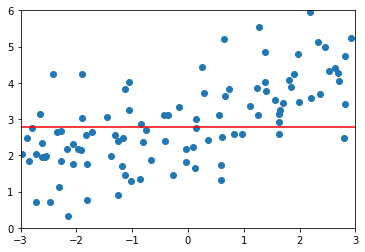

In [22]:
plot_model(ridge4_reg)

### 2、LASSO 回归（LASSO Regression）

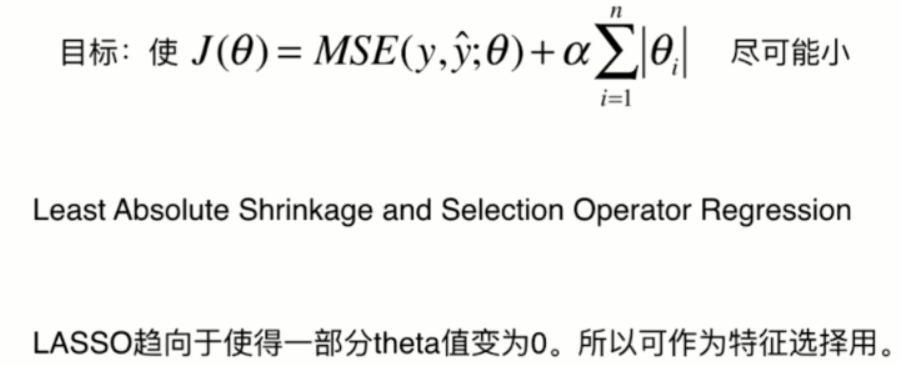

#### 使用LASSO

In [23]:
from sklearn.linear_model import Lasso

def LassoRegression(degree, alpha):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scaler", StandardScaler()),
        ("lasso_reg", Lasso(alpha=alpha))
    ])

In [24]:
lasso1_reg = LassoRegression(20, 0.01)
lasso1_reg.fit(X_train, y_train)

y1_predict = lasso1_reg.predict(X_test)
mean_squared_error(y_test, y1_predict)

1.0245900486685267

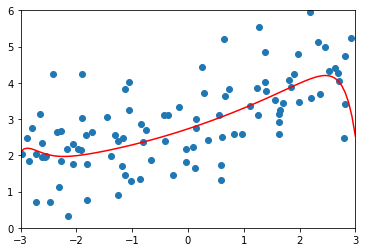

In [25]:
plot_model(lasso1_reg)

In [27]:
lasso2_reg = LassoRegression(20, 0.1)
lasso2_reg.fit(X_train, y_train)

y2_predict = lasso2_reg.predict(X_test)
mean_squared_error(y_test, y2_predict)

0.9805019196563026

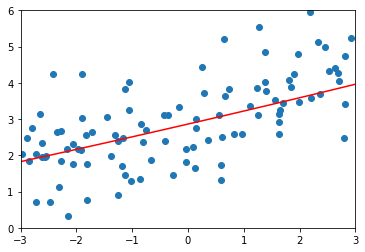

In [28]:
plot_model(lasso2_reg)

In [29]:
lasso3_reg = LassoRegression(20, 1)
lasso3_reg.fit(X_train, y_train)

y3_predict = lasso3_reg.predict(X_test)
mean_squared_error(y_test, y3_predict)

1.6919428748482677

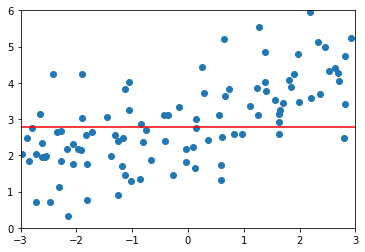

In [30]:
plot_model(lasso3_reg)

### 3、Ridge和LASSO的延伸

#### 计算泛型

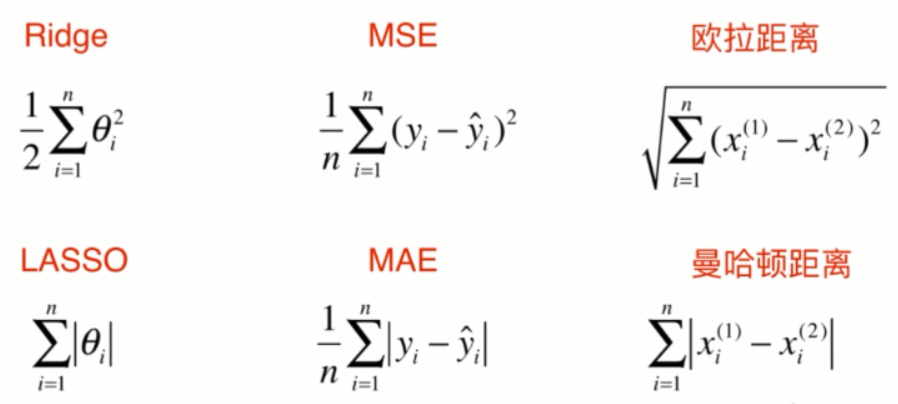

#### Lp范数

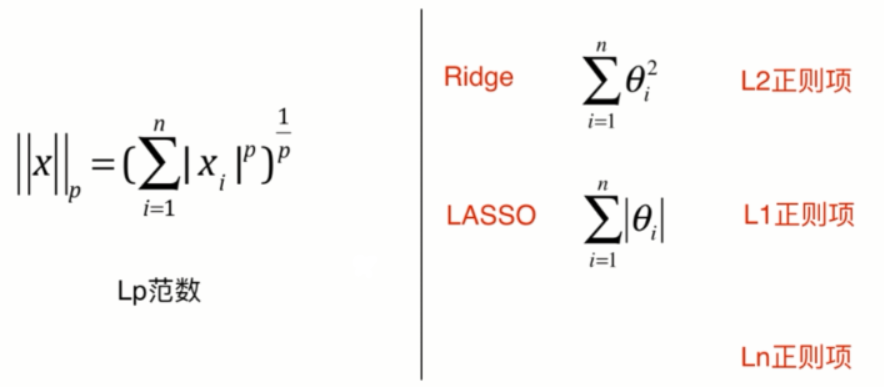

#### 正则化

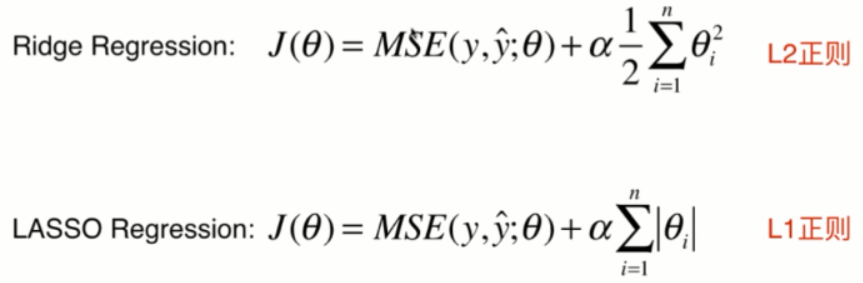

#### L0正则

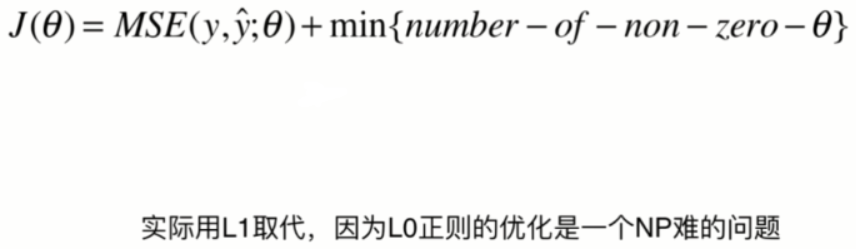

#### 弹性网（Elastic Net）

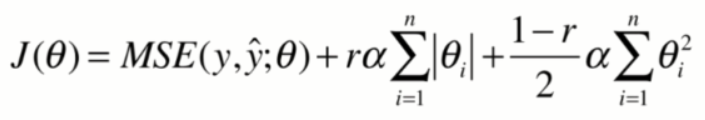